# Generating embeddings of handwritten digits using a Siamese Neural Network

This notebook is an introductory example of using Siamese Neural Networks and the Tensorflow-STNN-lib library. In this example, I show how an encoder network can be trained within a Siamese architecture to generate image embeddings of handwritten digits. The dataset used is the classic MNIST, which needs no introduction.

The first step is to install the Tensorflow-STNN-lib library. Installation is done via the Github address.

In [1]:
!pip install git+https://github.com/FilipeChagasDev/tensorflow-stnn-lib.git

  Cloning https://github.com/FilipeChagasDev/tensorflow-stnn-lib.git to /tmp/pip-req-build-zqzzicsb
  Running command git clone --filter=blob:none --quiet https://github.com/FilipeChagasDev/tensorflow-stnn-lib.git /tmp/pip-req-build-zqzzicsb
  Resolved https://github.com/FilipeChagasDev/tensorflow-stnn-lib.git to commit 2099d6a6c843cb88137a4ea35b9ab28eba418e07
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 29.0 MB/s eta 0:00:00
  Created wheel for tensorflow-stnn-lib: filename=tensorflow_stnn_lib-0.0.1-py3-none-any.whl size=13099 sha256=21138bba8b967bc66f52097033c548514de4cfc7311526f2da116cf8f168e4cc
  Stored in directory: /tmp/pip-ephem-wheel-cache-8wtookkp/wheels/3c/4a/d5/d77086c36a754fdd3c291bdbf1d114ae91bc217887c37b91d2
Successfully built tensorflow-stnn-l

The next step is to import the libraries to be used.

In [2]:
import tensorflow_stnn_lib as stnn
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense, Reshape
from tensorflow.keras import Model

Next, the MNIST handwritten digits dataset is loaded. This dataset is already present in Tensorflow, so it is very easy to load.

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


The Tensorflow-STNN-lib library has classes developed to process the datasets and feed the model optimizer. One of these classes is PairDataset, which is ideal for experiments with simple datasets in NumPy format, such as MNIST.

To instantiate a PairDataset, you just need to pass the dataset's X and Y arrays (which must be in the same MNIST shape pattern).

In [4]:
train_ds = stnn.PairDataset(batch_size=1000, dataset_x=train_X, dataset_y=train_y)
test_ds = stnn.PairDataset(batch_size=1000, dataset_x=test_X, dataset_y=test_y)

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

The encoder network must be defined as a Keras model. Remember that the input must be compatible with the data in the dataset and the output is an embedding (a vector of real numbers). I do not recommend using activation functions such as softmax or sigmoid at the output.

The ideal dimensionality of the embedding depends on each case. In this case, I used 3 dimensions to be able to plot the embeding space in the tests.

In [5]:
def build_encoder():
    input = Input(shape=(28,28))
    x = Flatten()(input)
    x = Dense(1000, activation='relu')(x)
    x = Dense(1000, activation='relu')(x)
    out = Dense(3, activation='linear')(x)
    model = Model(inputs=input, outputs=out)
    return model

The following cell creates a Siamese neural network instance (SiameseNet class) and trains that instance.

You must pass as an argument to the SiameseNet constructor the encoder input shape, encoder, and distance metric ('euclidean' or 'cosine'). The default is Euclidean distance. There are also other optional parameters such as margin and optimizer.

To train the Siamese network, call the fit method passing the PairDataset or PairDataGenerator objects and the number of training epochs. There are also other optional parameters that you can see in the documentation or other examples.

In [6]:
my_snn = stnn.SiameseNet((28,28), build_encoder(), distance='euclidean')
my_snn.fit(train_ds, test_ds, epochs=100)

EPOCH 1 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 311.1077


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 6.4634
Validation AUC: 0.5110
EPOCH 2 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 3.7402


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 2.0172
Validation AUC: 0.5147
EPOCH 3 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 1.3369


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.9221
Validation AUC: 0.5224
EPOCH 4 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.6941


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.5509
Validation AUC: 0.5881
EPOCH 5 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.4472


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.4084
Validation AUC: 0.6564
EPOCH 6 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.3315


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.3222
Validation AUC: 0.7093
EPOCH 7 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.2688


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.2643
Validation AUC: 0.7591
EPOCH 8 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.2307


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.2335
Validation AUC: 0.7897
EPOCH 9 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.2042


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.2255
Validation AUC: 0.7912
EPOCH 10 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1878


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.2053
Validation AUC: 0.8320
EPOCH 11 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1787


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1902
Validation AUC: 0.8469
EPOCH 12 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1707


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1749
Validation AUC: 0.8597
EPOCH 13 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1685


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1737
Validation AUC: 0.8612
EPOCH 14 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1732


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1663
Validation AUC: 0.8719
EPOCH 15 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1602


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.2069
Validation AUC: 0.8401
EPOCH 16 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1520


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1710
Validation AUC: 0.8716
EPOCH 17 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1567


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1594
Validation AUC: 0.8828
EPOCH 18 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.2246


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1713
Validation AUC: 0.8640
EPOCH 19 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1632


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1539
Validation AUC: 0.8841
EPOCH 20 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1591


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.2088
Validation AUC: 0.8392
EPOCH 21 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.2176


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1657
Validation AUC: 0.8698
EPOCH 22 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1476


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1679
Validation AUC: 0.8697
EPOCH 23 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1553


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1588
Validation AUC: 0.8762
EPOCH 24 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1907


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1801
Validation AUC: 0.8521
EPOCH 25 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1702


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.2012
Validation AUC: 0.8205
EPOCH 26 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1558


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1768
Validation AUC: 0.8504
EPOCH 27 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1413


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1501
Validation AUC: 0.8931
EPOCH 28 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1468


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1506
Validation AUC: 0.8862
EPOCH 29 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1680


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1453
Validation AUC: 0.8953
EPOCH 30 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1497


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1478
Validation AUC: 0.8900
EPOCH 31 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1455


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1531
Validation AUC: 0.8902
EPOCH 32 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1464


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1584
Validation AUC: 0.8811
EPOCH 33 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1571


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.2104
Validation AUC: 0.8333
EPOCH 34 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1600


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1692
Validation AUC: 0.8607
EPOCH 35 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1627


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1724
Validation AUC: 0.8588
EPOCH 36 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1496


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1772
Validation AUC: 0.8484
EPOCH 37 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1649


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1464
Validation AUC: 0.8977
EPOCH 38 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1570


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1611
Validation AUC: 0.8763
EPOCH 39 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1476


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1512
Validation AUC: 0.8928
EPOCH 40 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1317


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1547
Validation AUC: 0.8889
EPOCH 41 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1353


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1380
Validation AUC: 0.9062
EPOCH 42 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1346


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1417
Validation AUC: 0.9059
EPOCH 43 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1305


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1499
Validation AUC: 0.9002
EPOCH 44 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1292


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1481
Validation AUC: 0.9015
EPOCH 45 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1305


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1414
Validation AUC: 0.9094
EPOCH 46 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1242


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1343
Validation AUC: 0.9167
EPOCH 47 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1237


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1294
Validation AUC: 0.9208
EPOCH 48 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1278


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1278
Validation AUC: 0.9219
EPOCH 49 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1158


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1333
Validation AUC: 0.9171
EPOCH 50 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1082


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1281
Validation AUC: 0.9245
EPOCH 51 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1043


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1271
Validation AUC: 0.9260
EPOCH 52 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.1015


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1268
Validation AUC: 0.9265
EPOCH 53 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0990


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1267
Validation AUC: 0.9275
EPOCH 54 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0971


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1276
Validation AUC: 0.9270
EPOCH 55 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0955


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1288
Validation AUC: 0.9266
EPOCH 56 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0943


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1283
Validation AUC: 0.9277
EPOCH 57 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0932


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1296
Validation AUC: 0.9270
EPOCH 58 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0925


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1281
Validation AUC: 0.9290
EPOCH 59 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0917


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1263
Validation AUC: 0.9316
EPOCH 60 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0913


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1255
Validation AUC: 0.9330
EPOCH 61 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0921


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1242
Validation AUC: 0.9337
EPOCH 62 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0960


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1179
Validation AUC: 0.9401
EPOCH 63 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0947


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1194
Validation AUC: 0.9372
EPOCH 64 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0958


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1192
Validation AUC: 0.9408
EPOCH 65 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0899


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1134
Validation AUC: 0.9440
EPOCH 66 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0832


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1105
Validation AUC: 0.9462
EPOCH 67 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0794


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1096
Validation AUC: 0.9479
EPOCH 68 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0776


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1112
Validation AUC: 0.9479
EPOCH 69 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0775


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1094
Validation AUC: 0.9497
EPOCH 70 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0749


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1062
Validation AUC: 0.9526
EPOCH 71 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0729


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1095
Validation AUC: 0.9515
EPOCH 72 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0715


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1077
Validation AUC: 0.9540
EPOCH 73 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0682


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1014
Validation AUC: 0.9585
EPOCH 74 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0647


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0993
Validation AUC: 0.9602
EPOCH 75 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0620


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0988
Validation AUC: 0.9608
EPOCH 76 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0601


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0972
Validation AUC: 0.9621
EPOCH 77 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0585


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0966
Validation AUC: 0.9627
EPOCH 78 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0571


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0961
Validation AUC: 0.9632
EPOCH 79 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0559


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0953
Validation AUC: 0.9641
EPOCH 80 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0548


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0951
Validation AUC: 0.9645
EPOCH 81 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0540


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0955
Validation AUC: 0.9648
EPOCH 82 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0544


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.1017
Validation AUC: 0.9623
EPOCH 83 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0560


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0990
Validation AUC: 0.9637
EPOCH 84 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0569


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0930
Validation AUC: 0.9668
EPOCH 85 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0523


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0931
Validation AUC: 0.9674
EPOCH 86 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0493


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0926
Validation AUC: 0.9674
EPOCH 87 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0472


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0884
Validation AUC: 0.9700
EPOCH 88 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0448


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0864
Validation AUC: 0.9714
EPOCH 89 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0431


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0848
Validation AUC: 0.9727
EPOCH 90 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0418


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0840
Validation AUC: 0.9736
EPOCH 91 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0407


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0818
Validation AUC: 0.9753
EPOCH 92 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0396


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0788
Validation AUC: 0.9772
EPOCH 93 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0383


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0783
Validation AUC: 0.9780
EPOCH 94 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0369


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0783
Validation AUC: 0.9785
EPOCH 95 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0357


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0790
Validation AUC: 0.9789
EPOCH 96 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0344


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0783
Validation AUC: 0.9793
EPOCH 97 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0334


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0779
Validation AUC: 0.9797
EPOCH 98 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0326


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0761
Validation AUC: 0.9803
EPOCH 99 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0314


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0754
Validation AUC: 0.9810
EPOCH 100 OF 100


  0%|          | 0/120 [00:00<?, ?it/s]

Training Loss: 0.0307


  0%|          | 0/20 [00:00<?, ?it/s]

Validation Loss: 0.0759
Validation AUC: 0.9808


Use the plot_training_history method to plot a line graph with the evolution of loss and AUC throughout training.

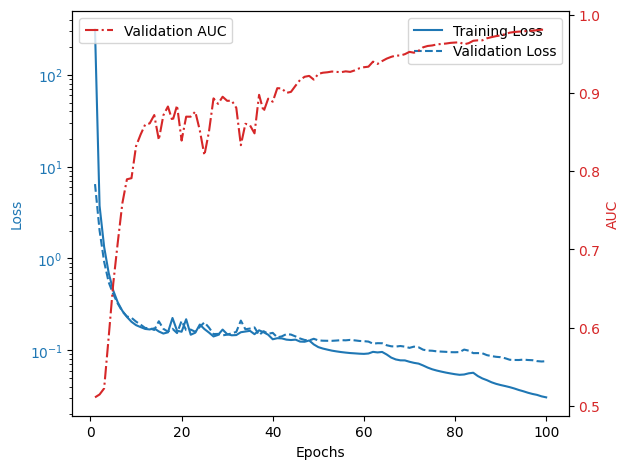

In [7]:
my_snn.plot_training_history()

To analyze the performance of the Siamese Neural Network, we can use a distance histogram and the ROC curve. The next code cells show how this can be done.

In [8]:
pos_dist, neg_dist = my_snn.get_test_distances(test_ds, distance='euclidean')

  0%|          | 0/20 [00:00<?, ?it/s]

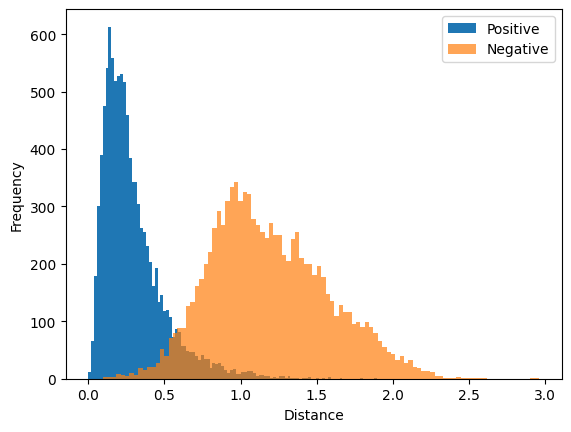

In [9]:
stnn.plot_histogram(pos_dist, neg_dist)

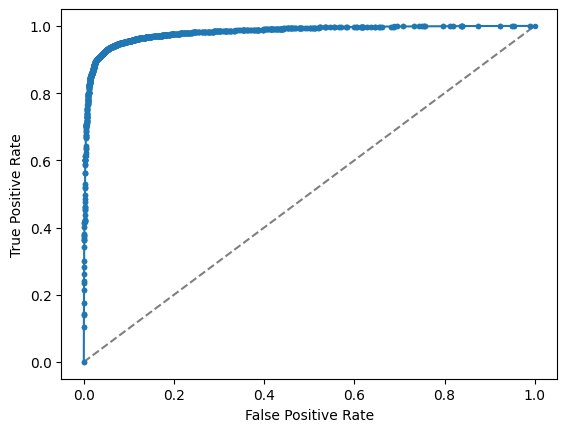

AUC: 0.9808142299999999


In [10]:
stnn.plot_roc(pos_dist, neg_dist)
print('AUC:', stnn.get_roc_auc(pos_dist, neg_dist))

Finally, it showed the embeddings in a 3D scatterplot. Notice how each class (0, 1, 2, ..., 9) has a cluster of points (embeddings) in space.

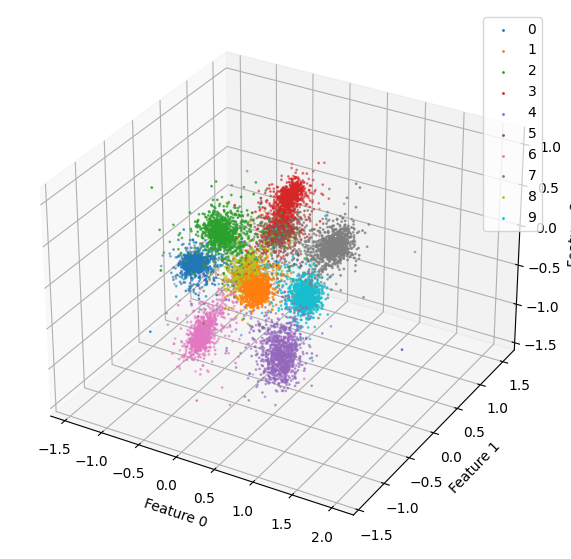

In [11]:
import matplotlib.pyplot as plt
test_emb = my_snn.get_embeddings(test_X)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
for i in range(10):
    ax.scatter(test_emb[:,0][test_y==i], test_emb[:,1][test_y==i], test_emb[:,2][test_y==i], s=1, label=i)
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 2')
plt.legend()
plt.show()